In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.drop(['CustomerID','Age','Genre'], axis = 1, inplace = True)

In [10]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 1.0, 'Annual Income Vs Spending Score')

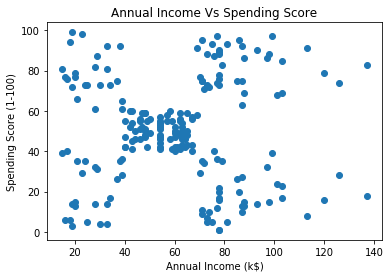

In [12]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income Vs Spending Score')

In [13]:
from sklearn.cluster import KMeans

In [25]:
model = KMeans(n_clusters=200)

In [26]:
model.fit(df)

c:\programdata\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (200). Possibly due to duplicate points in X.
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
#when n_clusters=1
model.inertia_

269981.28

In [24]:
#when n_clusters=2
model.inertia_

181363.59595959596

In [27]:
#when n_clusters=200
model.inertia_

0.0

In [28]:
l = []
for i in range(1,41):
    model = KMeans(n_clusters=i)
    model.fit(df)
    l.append(model.inertia_)

In [29]:
l

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30241.34361793659,
 25011.83934915659,
 21913.929201194416,
 19636.753964898147,
 17546.928000046548,
 15838.717785514087,
 14419.171753246754,
 13052.402225948656,
 11696.848903289692,
 11055.603831694621,
 10223.643719498892,
 9389.125934591724,
 8766.697564030173,
 7872.764071650781,
 7563.268098568098,
 7312.370552160259,
 7117.725363525364,
 6452.086071156151,
 6099.086111111112,
 5796.657110536522,
 5521.779365079365,
 5043.803604320516,
 4840.606712731713,
 4688.56432537191,
 4335.908443680502,
 4242.765404040404,
 4091.5727953333217,
 3816.733263958264,
 3545.9441586191588,
 3543.6556637806634,
 3377.791341991342,
 3143.1803030303035,
 3049.393939393939,
 2827.707683982684]

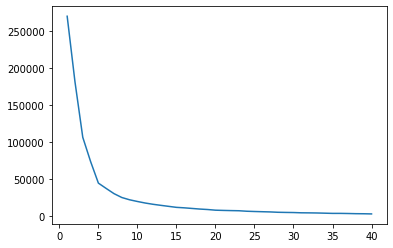

In [32]:
plt.plot(np.arange(1,41), l)

In [33]:
#at N = 5 elbow can be seen. Rate of decrease in wcss (Within Cluster Sum of Squares (of distance of point from centroid))
#so final model we will build using n = 5
model = KMeans(n_clusters=5)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
model.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [41]:
xl =[]
for x in model.cluster_centers_:
    print(x[0])
    xl.append(x[0])

26.304347826086982
86.53846153846155
55.29629629629632
88.20000000000002
25.727272727272755


In [42]:
yl =[]
for y in model.cluster_centers_:
    print(y[1])
    yl.append(y[1])

20.913043478260867
82.12820512820511
49.51851851851852
17.1142857142857
79.36363636363636


Text(0.5, 1.0, 'Annual Income Vs Spending Score')

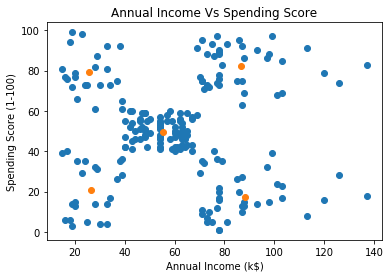

In [43]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.scatter(xl, yl)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income Vs Spending Score')

In [44]:
model.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [45]:
import seaborn as sns

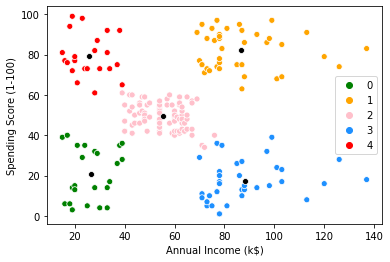

In [62]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data = df, hue = model.labels_, 
                palette=['green','orange','pink','dodgerblue','red'])
sns.scatterplot(xl,yl, color ='black')

In [49]:
model.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [50]:
cluster_pred = model.predict(df)

In [51]:
cluster_pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [52]:
df['cluster'] = cluster_pred

In [53]:
df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [65]:
type(df['cluster'][0])

numpy.int32

In [66]:
d = {0:'Low Income-Low Spend', 1:'High Income-High Spend',2:'Moderate Income-Moderate Spend', 3:'High Income-Low Spend',4:'Low Income-High Spend'}

In [70]:
df['cluster']=df['cluster'].map(d)

In [71]:
df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,Low Income-Low Spend
1,15,81,Low Income-High Spend
2,16,6,Low Income-Low Spend
3,16,77,Low Income-High Spend
4,17,40,Low Income-Low Spend
...,...,...,...
195,120,79,High Income-High Spend
196,126,28,High Income-Low Spend
197,126,74,High Income-High Spend
198,137,18,High Income-Low Spend


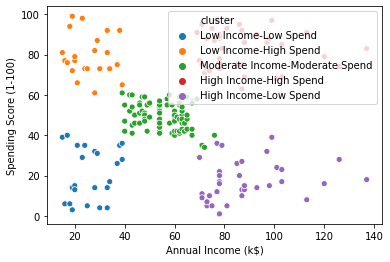

In [72]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', hue = 'cluster', data = df)

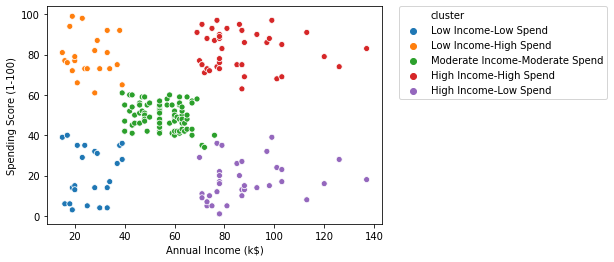

In [73]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', hue = 'cluster', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)